In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [2]:
import mglearn

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.datasets import load_iris, load_boston, load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [46]:
import warnings
warnings.filterwarnings('ignore')

# 1. 인공 신경망(Artificial Neural Network)

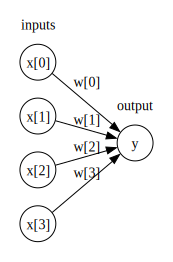

In [4]:
mglearn.plots.plot_logistic_regression_graph()

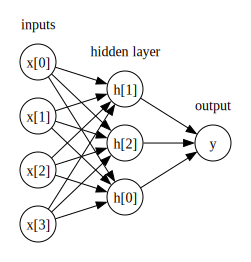

In [5]:
mglearn.plots.plot_single_hidden_layer_graph()

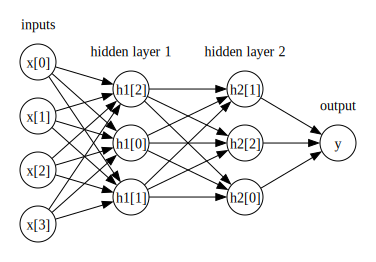

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

## (1) Perceptron

- 다수의 신호를 입력으로 받아 하나의 신호로 출력

### 1) AND gate

In [10]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [11]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 0
0, 1 -> 0
1, 1 -> 1


### 2) OR gate

In [12]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [13]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = OR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 1


In [ ]:
"""
XOR(Exclusive OR)
=====================

x1    x2    and    or    XOR
-----------------------------
T     T     T      T     F
T     F     F      T     T
F     T     F      T     T
F     F     F      F     F
"""

In [15]:
x = 12  # 00001100
key = 26543  # 01001100

result = x ^ key
print("암호화된 결과 : ", result)

print("복호화된 결과 : ", result ^ key)

암호화된 결과 :  26531
복호화된 결과 :  12


### 3) NAND gate

In [16]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    result = np.sum(x*w) + b
    if result <= 0:
        return 0
    else:
        return 1

In [18]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = NAND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 1
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


### 4) XOR gate

In [22]:
def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    
    return y

In [23]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = XOR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


## (2) 사이킷런에서의 인공신경망 구현

- Scikit Learn : Perceptron(), MLPClassifier()
- ML, DL 프레임워크 : Theano, Tensorflow, Pytorch, ...

### 1) Perceptron()

In [27]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=.3)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [30]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8888888888888888


### 2) MLPClassifier()

In [37]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=.3)

In [38]:
model = MLPClassifier(max_iter=100, hidden_layer_sizes=(200, 200, 200))
model.fit(X_train, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=100)

In [39]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9777777777777777


# 2. 종합 예제1

In [3]:
data = pd.read_csv("data/TravelInsurance.csv")
data.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,1,Government Sector,Yes,No,No,0
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No,0
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No,1
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No,0
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   AnnualIncome         1987 non-null   int64 
 2   FamilyMembers        1987 non-null   int64 
 3   ChronicDiseases      1987 non-null   int64 
 4   Employment Type      1987 non-null   object
 5   GraduateOrNot        1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## (1) X, y 나누기

In [4]:
X = data[data.columns[0:-1]]
y = data[[data.columns[-1]]]

## (2) train, test 나누기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y, 
                                                    random_state=42)

## (3) Preprocessing

In [6]:
##### 연속변수끼리 나누기
X_num = X_train[X_train.columns[0:4]]

##### 범주형 변수끼리 나누기
X_cat = X_train[X_train.columns[4:]]

##### 범주형 변수 원 핫 인코딩
X_cat = pd.get_dummies(X_cat)

In [7]:
##### 인덱스 재조정
X_cat = X_cat.reset_index(drop=True)

In [8]:
##### 테스트 데이터에서도 동일하게 진행
test_num = X_test[X_test.columns[0:4]]
test_cat = X_test[X_test.columns[4:]]
test_cat = pd.get_dummies(test_cat)
test_cat = test_cat.reset_index(drop=True)

In [9]:
X_cat.info()
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Employment Type_Government Sector             1390 non-null   uint8
 1   Employment Type_Private Sector/Self Employed  1390 non-null   uint8
 2   GraduateOrNot_No                              1390 non-null   uint8
 3   GraduateOrNot_Yes                             1390 non-null   uint8
 4   FrequentFlyer_No                              1390 non-null   uint8
 5   FrequentFlyer_Yes                             1390 non-null   uint8
 6   EverTravelledAbroad_No                        1390 non-null   uint8
 7   EverTravelledAbroad_Yes                       1390 non-null   uint8
dtypes: uint8(8)
memory usage: 11.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 8 columns):
 #   Column          

In [10]:
##### 범주형 변수를 동일하게 통합(필요할 경우에)
X_cat, test_cat = X_cat.align(test_cat, join="outer", axis=1)

In [11]:
##### 연속형 변수에서 정규화
scaler = MinMaxScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
test_scaled = scaler.transform(test_num)

In [12]:
##### 통합
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis=1, 
                    ignore_index=True)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, 
                       ignore_index=True)

In [13]:
X_final # 1390
test_final # 597

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.333333,0.285714,0.0,0,1,1,0,1,0,1,0
1,0.8,0.733333,0.142857,0.0,0,1,0,1,1,0,0,1
2,0.3,0.200000,0.142857,0.0,0,1,0,1,1,0,1,0
3,0.6,0.400000,0.857143,0.0,0,1,0,1,1,0,0,1
4,0.0,0.933333,0.142857,0.0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.0,0.566667,0.857143,0.0,0,1,1,0,1,0,1,0
593,0.3,0.200000,1.000000,0.0,1,0,0,1,1,0,1,0
594,0.1,0.200000,0.428571,1.0,0,1,0,1,1,0,1,0
595,0.6,0.400000,0.142857,0.0,0,1,0,1,1,0,1,0


## (4) 모델 학습

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### 1) KNN

In [56]:
model = KNeighborsClassifier()

params = {"n_neighbors" : [1, 3, 5, 7, 9, 11]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [57]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'n_neighbors': 9}
Best Score :  0.7784172661870504
Test Score :  0.7688442211055276


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
model = KNeighborsClassifier(n_neighbors=9).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

훈련 점수 :  0.8129496402877698
테스트 점수 :  0.7688442211055276


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

### 2) LogisticRegression

In [59]:
model = LogisticRegression()

params = {"C" : [1, 10, 100, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001]})

In [60]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'C': 10}
Best Score :  0.7683453237410072
Test Score :  0.7621440536013401


In [61]:
model = LogisticRegression(C=10).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

훈련 점수 :  0.7726618705035971
테스트 점수 :  0.7621440536013401


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3) DecisionTree

In [62]:
model = DecisionTreeClassifier()

params = {"max_depth" : range(2, 10, 2), "min_samples_leaf":range(1, 50, 2)}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(1, 50, 2)})

In [63]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'max_depth': 4, 'min_samples_leaf': 3}
Best Score :  0.839568345323741
Test Score :  0.8224455611390284


In [64]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3).fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

훈련 점수 :  0.841726618705036
테스트 점수 :  0.8224455611390284


### 4) RandomForest

In [65]:
model = RandomForestClassifier()

params = {"n_estimators":range(100, 1000, 100),
         "max_features":["auto", "sqrt", "log2"]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)})

In [66]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'max_features': 'auto', 'n_estimators': 900}
Best Score :  0.8035971223021583
Test Score :  0.7839195979899497


In [67]:
model = RandomForestClassifier(n_estimators=900, 
                               max_features="auto").fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

C:\Users\acorn\AppData\Local\Temp\ipykernel_6436\3164908257.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=900,


훈련 점수 :  0.9280575539568345
테스트 점수 :  0.7772194304857621


### 5) SVM

In [15]:
model = SVC().fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 점수 :  0.7942446043165468
테스트 점수 :  0.7688442211055276


In [17]:
params = {"kernel":["rbf", "linear"], "C":[0.001, 0.01, 0.1, 1, 10, 100],
         "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']})

In [18]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score :  0.8057553956834532
Test Score :  0.7956448911222781


### 6) Naive-Bayes

In [19]:
model = GaussianNB().fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

훈련 점수 :  0.7215827338129497
테스트 점수 :  0.7286432160804021


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
params = {"var_smoothing":[0.1, 0.001, 0.0001, 0, 1, 2, 3, 4, 5, 6, 7, 8]}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.001, 0.0001, 0, 1, 2, 3, 4, 5,
                                           6, 7, 8]})

In [22]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'var_smoothing': 1}
Best Score :  0.7654676258992806
Test Score :  0.7638190954773869


### 7) Artificial Neural Network

In [24]:
model = MLPClassifier().fit(X_final, y_train)

print("훈련 점수 : ", model.score(X_final, y_train))

pred = model.predict(test_final)
print("테스트 점수 : ", accuracy_score(y_test, pred))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 점수 :  0.8273381294964028
테스트 점수 :  0.7956448911222781


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
params = {"max_iter":[100, 500],
         "hidden_layer_sizes" : [(200, 200, 200), (200, 200, 200, 200)]}

grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_final, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization h

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200, 200, 200),
                                                (200, 200, 200, 200)],
                         'max_iter': [100, 500]})

In [26]:
print("Best Parameter : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("Test Score : ", grid_search.score(test_final, y_test))

Best Parameter :  {'hidden_layer_sizes': (200, 200, 200), 'max_iter': 100}
Best Score :  0.8064748201438849
Test Score :  0.7755443886097152


# 3. 종합예제2

- https://www.kaggle.com/c/titanic

## (1) prepare the data

In [4]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## (2) EDA

In [6]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(5, 3))

## (3) Feature Engineering

In [7]:
train_test_data = [train, test]

### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [8]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([a-zA-Z]+)\.")

In [9]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [10]:
title_map = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 
 'Mme':3, 'Ms':3, 'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 
 'Capt':3, 'Countess':3,'Jonkheer':3, "Dona":3}

for dataset in train_test_data:
    dataset["Title1"] = dataset["Title"].map(title_map)

In [73]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title1        0
FamilySize    0
dtype: int64

In [11]:
train.drop("Name", axis=1, inplace=True)
train.drop("Title", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)
test.drop("Title", axis=1, inplace=True)

### 2) Age의 Binning

- child:0, young:1, adult:2, mid:3, senior:4

In [12]:
##### 결측치 처리

train["Age"].fillna(train.groupby("Title1")["Age"].transform("median"), 
                   inplace=True)

test["Age"].fillna(test.groupby("Title1")["Age"].transform("median"), 
                   inplace=True)

In [13]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title1           0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title1           0
dtype: int64


In [14]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [15]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,1
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,1


### 3) Embarked의 결측치 처리와 숫자 인코딩

In [16]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train["Embarked"].fillna("S", inplace=True)

In [18]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [19]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,male,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,0,1
2,894,2,male,4.0,0,0,240276,9.6875,NaN,2,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,0,1


### 4) Fare의 결측치 처리와 Binning

- 결측치는 Pclass의 Fare를 median으로 처리해서 넣어준다.
- 17 이하이면 0, 18 ~ 30은 1, 31 ~ 100은 2, 그 이상은 3으로 설정

In [20]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), 
                   inplace=True)

In [21]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[dataset["Fare"]>100, "Fare"] = 3

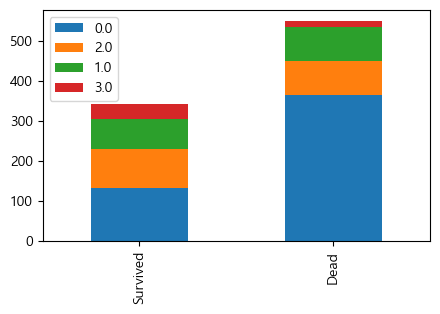

In [22]:
bar_chart("Fare")

In [74]:
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

### 5) Cabin 처리

In [23]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [24]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [25]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

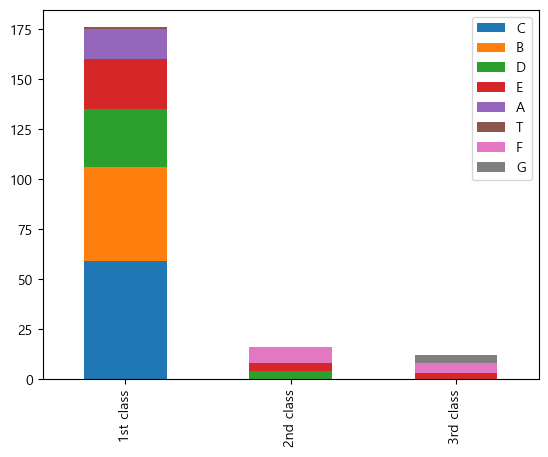

In [26]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

pd.DataFrame([Pclass1, Pclass2, Pclass3], 
             index=["1st class", "2nd class", "3rd class"]).plot(kind="bar",
                                                                stacked=True)

In [27]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map({"A":0, "B":0.4, "C":0.8,
                                            "D":1.2, "E":1.6, "F":2,
                                            "G":2.4})

In [28]:
train.Cabin.value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
Name: Cabin, dtype: int64

In [29]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), 
                   inplace=True)

test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), 
                   inplace=True)

In [30]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title1       891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### 6) 성별 숫자 인코딩

In [31]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

In [32]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title1
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,1
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,1


### 7) 동승자 컬럼 합치기

In [33]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [34]:
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: FamilySize, dtype: int64

### 8) 필요없는 특성 제거 및 모델링 데이터 준비

In [35]:
features_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [36]:
train = train.drop(["PassengerId"], axis=1)

In [37]:
train.head()
#test.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title1,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,1,2
2,1,3,1,2.0,0.0,2.0,0,2,1
3,1,1,1,2.0,2.0,0.8,0,1,2
4,0,3,0,2.0,0.0,2.0,0,0,1


In [38]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [39]:
print(X.shape, y.shape)

(891, 8) (891,)


In [40]:
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target.csv", index=False)
test.to_csv("data/titanic/test-data.csv", index=False)

## (4) Model Training

- KNN
- DecisionTree
- RandomForest
- SVM
- NaiveBayes
- NeuralNetwork

In [41]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
##### KNN

knnclf = KNeighborsClassifier(n_neighbors=20)
score = cross_val_score(knnclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.8        0.78651685 0.83146067 0.84269663 0.86516854 0.79775281
 0.80898876 0.80898876 0.80898876 0.84269663]
81.93


In [51]:
#### DecisionTree

dtclf= DecisionTreeClassifier(max_depth=6)
score = cross_val_score(dtclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.8        0.87640449 0.79775281 0.82022472 0.87640449 0.78651685
 0.84269663 0.83146067 0.79775281 0.83146067]
82.61


In [52]:
#### RandomForest
rfclf= RandomForestClassifier(n_estimators=200)
score = cross_val_score(rfclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.8        0.86516854 0.80898876 0.79775281 0.88764045 0.84269663
 0.82022472 0.80898876 0.7752809  0.82022472]
82.27


In [53]:
#### NaiveBayes
from sklearn.naive_bayes import BernoulliNB

nbclf= BernoulliNB()
score = cross_val_score(nbclf, X, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]
78.56


In [55]:
#### SupportVector

scaler= MinMaxScaler()
scaler.fit(X)

X_scaled= scaler.transform(X)

svmclf= SVC()
score = cross_val_score(svmclf, X_scaled, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.81111111 0.84269663 0.79775281 0.83146067 0.85393258 0.82022472
 0.83146067 0.82022472 0.79775281 0.82022472]
82.27


In [58]:
#### Neural

mlclf= MLPClassifier(hidden_layer_sizes=(300,300,300))
score = cross_val_score(mlclf, X_scaled, y, cv=kfold, scoring="accuracy")
print(score)
print(round(np.mean(score)*100, 2))

[0.82222222 0.78651685 0.79775281 0.82022472 0.8988764  0.80898876
 0.83146067 0.82022472 0.84269663 0.86516854]
82.94


## (5) Testing

In [68]:
model= SVC()
model.fit(X_scaled, y)

SVC()

In [69]:
test_copy= test.drop('PassengerId', axis=1).copy()
test_copy= scaler.transform(test_copy)

In [70]:
preds= model.predict(test_copy)

In [71]:
submission= pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':preds})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
submission.to_csv('data/titanic/submission.csv', index=False)

In [75]:
!python --version

Python 3.9.13
